In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

多热编码multi-hot-encoding的含义是，一段文本对应一个N维（例如10000维）的向量，
每一维代表一个字，只要文中出现过该字，则该维即为1，没有出现则为0.

In [3]:
NUM_WORDS=10000
(train_data, train_labels),(test_data, test_labels)=keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1 
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

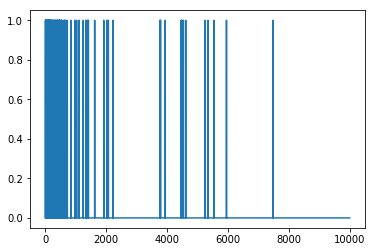

In [4]:
plt.plot(train_data[0])

In [6]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
baseline_model.compile(optimizer='adam', loss='binary_crossentropy',
                      metrics=['accuracy','binary_crossentropy'])
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [7]:
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 0.5039 - acc: 0.7994 - binary_crossentropy: 0.5039 - val_loss: 0.3536 - val_acc: 0.8722 - val_binary_crossentropy: 0.3536
Epoch 2/20
 - 4s - loss: 0.2619 - acc: 0.9070 - binary_crossentropy: 0.2619 - val_loss: 0.2872 - val_acc: 0.8865 - val_binary_crossentropy: 0.2872
Epoch 3/20
 - 4s - loss: 0.1900 - acc: 0.9342 - binary_crossentropy: 0.1900 - val_loss: 0.2866 - val_acc: 0.8860 - val_binary_crossentropy: 0.2866
Epoch 4/20
 - 4s - loss: 0.1505 - acc: 0.9490 - binary_crossentropy: 0.1505 - val_loss: 0.3083 - val_acc: 0.8803 - val_binary_crossentropy: 0.3083
Epoch 5/20
 - 4s - loss: 0.1225 - acc: 0.9608 - binary_crossentropy: 0.1225 - val_loss: 0.3314 - val_acc: 0.8764 - val_binary_crossentropy: 0.3314
Epoch 6/20
 - 4s - loss: 0.0987 - acc: 0.9707 - binary_crossentropy: 0.0987 - val_loss: 0.3587 - val_acc: 0.8723 - val_binary_crossentropy: 0.3587
Epoch 7/20
 - 4s - loss: 0.0796 - acc: 0.9784 - binary_crossentropy:

In [8]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
smaller_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [9]:
smaller_history = smaller_model.fit(train_data,
                                   train_labels,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(test_data, test_labels),
                                   verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.5573 - acc: 0.7686 - binary_crossentropy: 0.5573 - val_loss: 0.4358 - val_acc: 0.8605 - val_binary_crossentropy: 0.4358
Epoch 2/20
 - 4s - loss: 0.3423 - acc: 0.8968 - binary_crossentropy: 0.3423 - val_loss: 0.3335 - val_acc: 0.8824 - val_binary_crossentropy: 0.3335
Epoch 3/20
 - 4s - loss: 0.2543 - acc: 0.9211 - binary_crossentropy: 0.2543 - val_loss: 0.2973 - val_acc: 0.8864 - val_binary_crossentropy: 0.2973
Epoch 4/20
 - 4s - loss: 0.2083 - acc: 0.9337 - binary_crossentropy: 0.2083 - val_loss: 0.2876 - val_acc: 0.8871 - val_binary_crossentropy: 0.2876
Epoch 5/20
 - 4s - loss: 0.1788 - acc: 0.9440 - binary_crossentropy: 0.1788 - val_loss: 0.2895 - val_acc: 0.8834 - val_binary_crossentropy: 0.2895
Epoch 6/20
 - 4s - loss: 0.1569 - acc: 0.9507 - binary_crossentropy: 0.1569 - val_loss: 0.2917 - val_acc: 0.8844 - val_binary_crossentropy: 0.2917
Epoch 7/20
 - 4s - loss: 0.1395 - acc: 0.9584 - binary_crossentropy:

In [10]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [12]:
bigger_history=bigger_model.fit(train_data,
                train_labels,
                epochs=20,
                batch_size=512,
                validation_data=(test_data, test_labels),
                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 13s - loss: 0.3469 - acc: 0.8532 - binary_crossentropy: 0.3469 - val_loss: 0.3058 - val_acc: 0.8759 - val_binary_crossentropy: 0.3058
Epoch 2/20
 - 12s - loss: 0.1470 - acc: 0.9470 - binary_crossentropy: 0.1470 - val_loss: 0.3618 - val_acc: 0.8631 - val_binary_crossentropy: 0.3618
Epoch 3/20
 - 12s - loss: 0.0613 - acc: 0.9805 - binary_crossentropy: 0.0613 - val_loss: 0.4122 - val_acc: 0.8668 - val_binary_crossentropy: 0.4122
Epoch 4/20
 - 13s - loss: 0.0126 - acc: 0.9977 - binary_crossentropy: 0.0126 - val_loss: 0.5795 - val_acc: 0.8662 - val_binary_crossentropy: 0.5795
Epoch 5/20
 - 13s - loss: 0.0021 - acc: 0.9999 - binary_crossentropy: 0.0021 - val_loss: 0.6660 - val_acc: 0.8694 - val_binary_crossentropy: 0.6660
Epoch 6/20
 - 14s - loss: 9.3413e-04 - acc: 1.0000 - binary_crossentropy: 9.3413e-04 - val_loss: 0.6985 - val_acc: 0.8685 - val_binary_crossentropy: 0.6985
Epoch 7/20
 - 13s - loss: 2.2159e-04 - acc: 1.0000 - b

In [14]:
baseline_model.save("tt4_model.h5")
smaller_model.save("tt4_smaller_model.h5")
bigger_model.save("tt4_bigger_model.h5")